In [1]:
#Import necessary library
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Read dataset from file
df = pd.read_csv("income.csv")
#Showing data
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

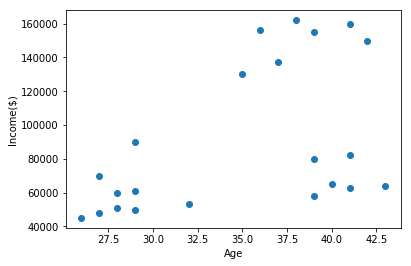

In [3]:
#Represent the data with plt.scater
#Work with 2 data column 'Age' & 'Income($)'
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
#Set up number of center (n_clusters=3)
km = KMeans(n_clusters=3)
#Fit data with prediction
#Array value show cluster that data belong to
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [5]:
#Visualize prediction with table
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [6]:
#Show position of center
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

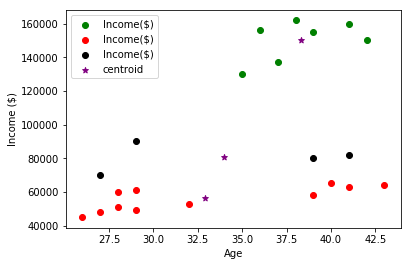

In [7]:
#Separate data into specification dataframe (df)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
#Show in plt each df with difference color
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
#Highlight center of each cluster 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#Set up plt
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [8]:
#As we can see 2 point have wrong position because the difference of 2 Income min and max is too large
#So we use minmaxscaler to calculate
#Preprocessing using min max scaler

scaler = MinMaxScaler()
#Fit Income data with scaler
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
#Fit Age data with scaler
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
#Data after scale and fit with cluster
#Show data
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


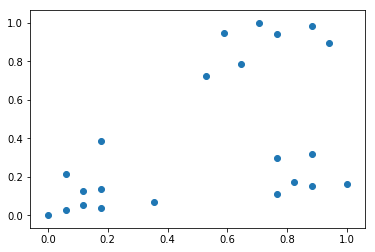

In [10]:
#Show and visualize data after scale with plt
plt.scatter(df.Age,df['Income($)'])

In [11]:
#Set scale data into KMean
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [12]:
#Set into dataframe
df['cluster']=y_predicted
#Show dataframe
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [13]:
#Value of cluster center after scale
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

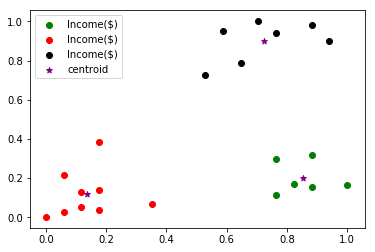

In [14]:
#Separate data into specification dataframe (df)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
#Show in plt each df with difference color
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
#Highlight center of each cluster 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [15]:
#Now we have correct data with cluster
#Display Elbow Plot how we can choose k center

#Distance of each data point to its center
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

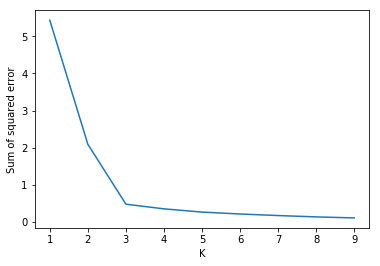

In [16]:
#Show distance with each k center
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)